# Load the data

In [7]:
import pandas
import numpy
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import time
from sklearn import metrics
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
# fix random seed for reproducibility
plt.rcParams['figure.figsize'] = (15, 6)

In [8]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
plt.rcParams['figure.figsize'] = (15, 6)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
names = ["sex", "length", "diameter", "height", "whole weight", 
                "shucked weight", "viscera weight", "shell weight", "rings"]
data = pandas.read_csv('abalone.data.txt', names=names)
peek = data.head(10)
print(peek)

  sex  length  diameter  height  whole weight  shucked weight  viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   
5   I   0.425     0.300   0.095        0.3515          0.1410          0.0775   
6   F   0.530     0.415   0.150        0.7775          0.2370          0.1415   
7   F   0.545     0.425   0.125        0.7680          0.2940          0.1495   
8   M   0.475     0.370   0.125        0.5095          0.2165          0.1125   
9   F   0.550     0.440   0.150        0.8945          0.3145          0.1510   

   shell weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3       

In [9]:
shape = data.shape
print(shape)

(4177, 9)


In [10]:
types = data.dtypes
print(types)

sex                object
length            float64
diameter          float64
height            float64
whole weight      float64
shucked weight    float64
viscera weight    float64
shell weight      float64
rings               int64
dtype: object


In [11]:
pandas.set_option('display.width', 100)
pandas.set_option('precision', 3)
description = data.describe()
print(description)

         length  diameter    height  whole weight  shucked weight  viscera weight  shell weight  \
count  4177.000  4177.000  4177.000      4177.000        4177.000       4.177e+03      4177.000   
mean      0.524     0.408     0.140         0.829           0.359       1.806e-01         0.239   
std       0.120     0.099     0.042         0.490           0.222       1.096e-01         0.139   
min       0.075     0.055     0.000         0.002           0.001       5.000e-04         0.002   
25%       0.450     0.350     0.115         0.442           0.186       9.350e-02         0.130   
50%       0.545     0.425     0.140         0.799           0.336       1.710e-01         0.234   
75%       0.615     0.480     0.165         1.153           0.502       2.530e-01         0.329   
max       0.815     0.650     1.130         2.825           1.488       7.600e-01         1.005   

          rings  
count  4177.000  
mean      9.934  
std       3.224  
min       1.000  
25%       8.000  


In [12]:
class_counts = data.groupby('sex').size()
print(class_counts)

sex
F    1307
I    1342
M    1528
dtype: int64


In [13]:
correlations = data.corr(method='pearson')
print(correlations)

                length  diameter  height  whole weight  shucked weight  viscera weight  \
length           1.000     0.987   0.828         0.925           0.898           0.903   
diameter         0.987     1.000   0.834         0.925           0.893           0.900   
height           0.828     0.834   1.000         0.819           0.775           0.798   
whole weight     0.925     0.925   0.819         1.000           0.969           0.966   
shucked weight   0.898     0.893   0.775         0.969           1.000           0.932   
viscera weight   0.903     0.900   0.798         0.966           0.932           1.000   
shell weight     0.898     0.905   0.817         0.955           0.883           0.908   
rings            0.557     0.575   0.557         0.540           0.421           0.504   

                shell weight  rings  
length                 0.898  0.557  
diameter               0.905  0.575  
height                 0.817  0.557  
whole weight           0.955  0.540  

 encode the labels
sex
F    0
I    1
M    2

In [14]:
data = data.replace('F',0)
data = data.replace('I',1)
data = data.replace('M',2)

In [15]:
skew = data.skew()
print(skew)

sex              -0.098
length           -0.640
diameter         -0.609
height            3.129
whole weight      0.531
shucked weight    0.719
viscera weight    0.592
shell weight      0.621
rings             1.114
dtype: float64


In [16]:
peek = data.head(10)
print(peek)

   sex  length  diameter  height  whole weight  shucked weight  viscera weight  shell weight  \
0    2   0.455     0.365   0.095         0.514           0.225           0.101         0.150   
1    2   0.350     0.265   0.090         0.226           0.100           0.049         0.070   
2    0   0.530     0.420   0.135         0.677           0.257           0.141         0.210   
3    2   0.440     0.365   0.125         0.516           0.215           0.114         0.155   
4    1   0.330     0.255   0.080         0.205           0.089           0.040         0.055   
5    1   0.425     0.300   0.095         0.351           0.141           0.077         0.120   
6    0   0.530     0.415   0.150         0.777           0.237           0.141         0.330   
7    0   0.545     0.425   0.125         0.768           0.294           0.149         0.260   
8    2   0.475     0.370   0.125         0.509           0.216           0.113         0.165   
9    0   0.550     0.440   0.150        

In [17]:
types = data.dtypes
print(types)

sex                 int64
length            float64
diameter          float64
height            float64
whole weight      float64
shucked weight    float64
viscera weight    float64
shell weight      float64
rings               int64
dtype: object


In [18]:
correlations = data.corr(method='pearson')
print(correlations)

                  sex  length  diameter  height  whole weight  shucked weight  viscera weight  \
sex             1.000  -0.036    -0.039  -0.042        -0.021          -0.001          -0.032   
length         -0.036   1.000     0.987   0.828         0.925           0.898           0.903   
diameter       -0.039   0.987     1.000   0.834         0.925           0.893           0.900   
height         -0.042   0.828     0.834   1.000         0.819           0.775           0.798   
whole weight   -0.021   0.925     0.925   0.819         1.000           0.969           0.966   
shucked weight -0.001   0.898     0.893   0.775         0.969           1.000           0.932   
viscera weight -0.032   0.903     0.900   0.798         0.966           0.932           1.000   
shell weight   -0.035   0.898     0.905   0.817         0.955           0.883           0.908   
rings          -0.035   0.557     0.575   0.557         0.540           0.421           0.504   

                shell weight 

In [19]:
data.tail()

sex  length  diameter  height  whole weight  shucked weight  viscera weight  shell weight  \
4172    0   0.565     0.450   0.165         0.887           0.370           0.239         0.249   
4173    2   0.590     0.440   0.135         0.966           0.439           0.214         0.261   
4174    2   0.600     0.475   0.205         1.176           0.525           0.287         0.308   
4175    0   0.625     0.485   0.150         1.095           0.531           0.261         0.296   
4176    2   0.710     0.555   0.195         1.948           0.946           0.377         0.495   

      rings  
4172     11  
4173     10  
4174      9  
4175     10  
4176     12

In [20]:
data.head()

sex  length  diameter  height  whole weight  shucked weight  viscera weight  shell weight  \
0    2   0.455     0.365   0.095         0.514           0.225           0.101         0.150   
1    2   0.350     0.265   0.090         0.226           0.100           0.049         0.070   
2    0   0.530     0.420   0.135         0.677           0.257           0.141         0.210   
3    2   0.440     0.365   0.125         0.516           0.215           0.114         0.155   
4    1   0.330     0.255   0.080         0.205           0.089           0.040         0.055   

   rings  
0     15  
1      7  
2      9  
3     10  
4      7

# Visulize the data

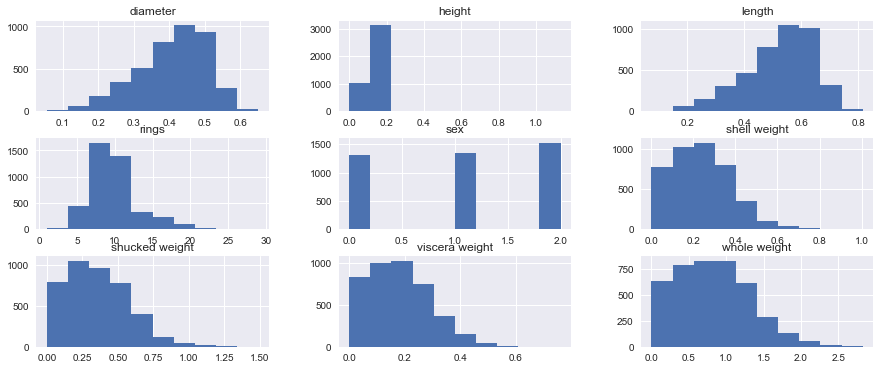

In [21]:
data.hist()
plt.show()

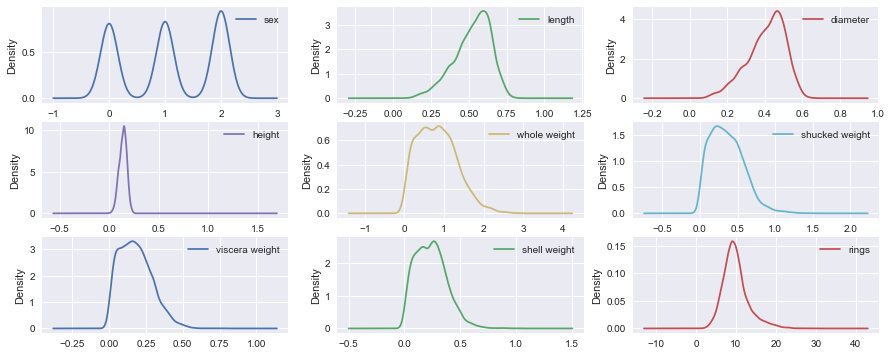

In [22]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

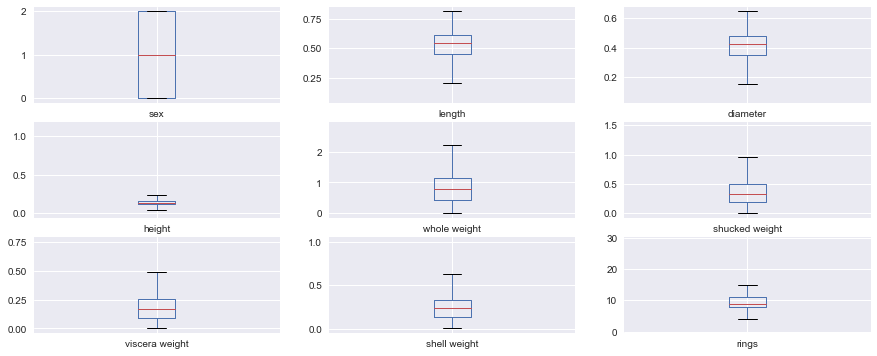

In [23]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

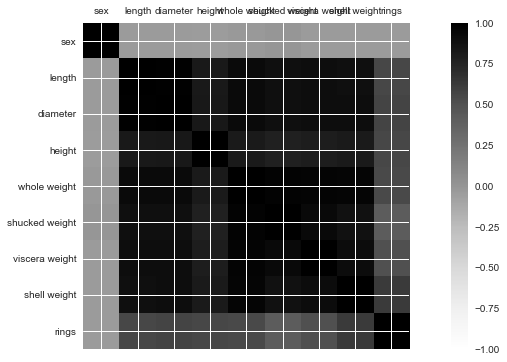

In [24]:
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

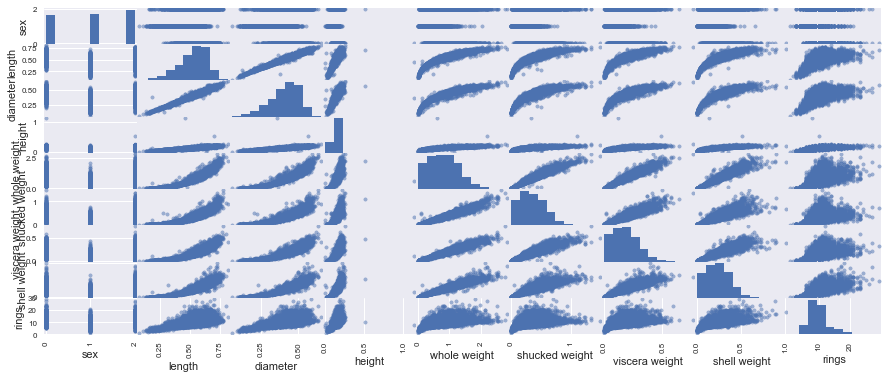

In [25]:
scatter_matrix(data)
plt.show()

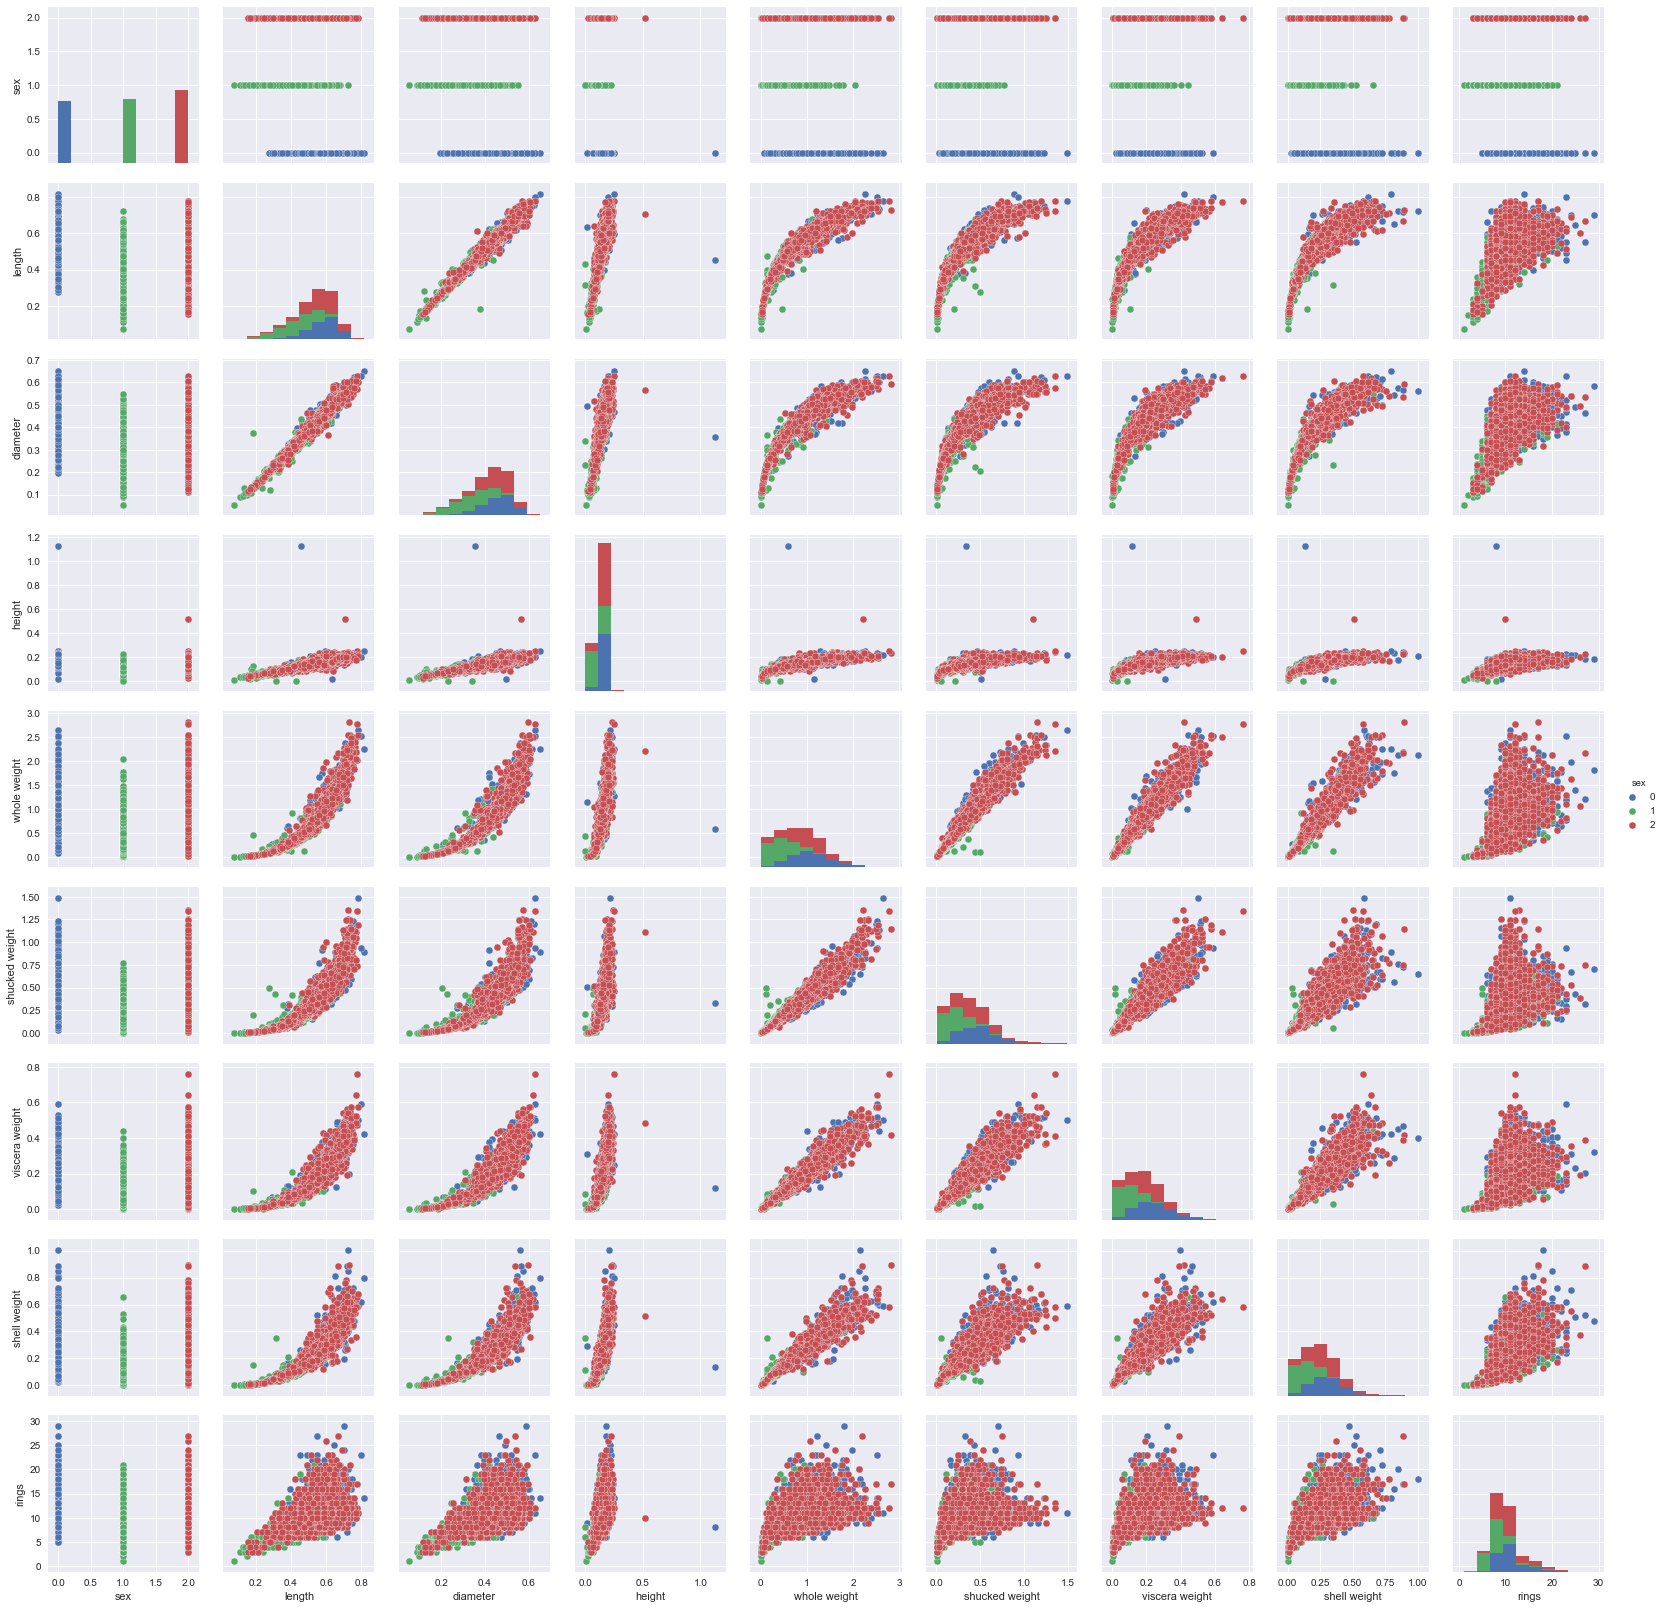

In [26]:
import seaborn as sns
sns.pairplot(data, hue='sex')

# Prepare the data for classification

In [27]:
from sklearn import preprocessing
dataset = data.values
X = dataset[:,1:9].astype(float)
Y = dataset[:,0]
features = preprocessing.scale(X)
target = Y

In [29]:
print(target.shape)
print(dataset.shape)

(4177,)
(4177, 9)


In [31]:
from sklearn.cross_validation import train_test_split
# Extracting 20% testing data
X_train_feature, X_deploy, y_train_feature, y_deploy = train_test_split(
    features, target, test_size=0.20, random_state=17)
# Make training and validation data sets for building the models and choose the hyperparameters
X_train, X_test, y_train, y_test = train_test_split(
    X_train_feature, y_train_feature, test_size=0.20, random_state=17)
print('Number of training examples',len(X_train))
print('Number of validation examples',len(X_test))
print('Number of testing examples',len(X_deploy))


Number of training examples 2672
Number of validation examples 669
Number of testing examples 836


## Preproccing

In [32]:
from sklearn import preprocessing
# normalize the data attributes
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)
X_deploy = preprocessing.normalize(X_deploy)
# standardize the data attributes
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
X_deploy = preprocessing.scale(X_deploy)

# Feature Selection

In [33]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.10950964  0.12066849  0.11734038  0.15964474  0.13935065  0.11272409
  0.11008735  0.13067466]


# Building classifiers

## KNN classifier
It turns out that k=5 is the best choose of k on the validation set

In [36]:
from sklearn.neighbors import KNeighborsClassifier
clf_neigh = KNeighborsClassifier(n_neighbors=5)
#Training
start_time = time.time()
clf_neigh.fit(X_train, y_train)
print("The time for training KNN is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_neigh.predict(X_test)
print("\n===================================================================")
print("The accuracy on validation dataset of Knn : \t", metrics.accuracy_score(y_test, y_pred))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['F','I','M']))

The time for training KNN is  0.0022039413452148438 seconds 

The accuracy on validation dataset of Knn : 	 0.515695067265
             precision    recall  f1-score   support

          F       0.41      0.44      0.43       219
          I       0.68      0.74      0.71       211
          M       0.44      0.38      0.41       239

avg / total       0.51      0.52      0.51       669



## SVM classifier
### Linear SVM "LinearSVC"
It turns out that C=20 is the best on the validation set

In [37]:
from sklearn.svm import LinearSVC
clf_svm_linear = LinearSVC(C=20.0)
#Training
start_time = time.time()
clf_svm_linear.fit(X_train, y_train)
print("The time for training SVM is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_svm_linear.predict(X_test)
print("\n===================================================================")
print("The accuracy on validation dataset of Knn : \t", metrics.accuracy_score(y_test, y_pred))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['F','I','M']))

The time for training SVM is  0.3760950565338135 seconds 

The accuracy on validation dataset of Knn : 	 0.54110612855
             precision    recall  f1-score   support

          F       0.52      0.22      0.31       219
          I       0.59      0.86      0.70       211
          M       0.49      0.55      0.52       239

avg / total       0.53      0.54      0.51       669



###  SVM "SVC" with kernel='rbf' 
It turns out that C=5 is the best on the validation set


In [38]:
from sklearn.svm import SVC
clf_svm = SVC(C=5.0, kernel='rbf')
#Training
start_time = time.time()
clf_svm.fit(X_train, y_train)
print("The time for training SVM is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_svm.predict(X_test)
print("\n===================================================================")
print("The accuracy on validation dataset of Knn : \t", metrics.accuracy_score(y_test, y_pred))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['F','I','M']))

The time for training SVM is  0.265887975692749 seconds 

The accuracy on validation dataset of Knn : 	 0.553064275037
             precision    recall  f1-score   support

          F       0.50      0.37      0.43       219
          I       0.66      0.80      0.72       211
          M       0.48      0.50      0.49       239

avg / total       0.54      0.55      0.54       669



## Decsion Tree classifier
### DT with Gini impurity "gini", CART (Classification and Regression Trees)
It turns out that min_samples_split=2 is the best on the validation set

In [40]:
# CART tree
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(min_samples_split=2)
#Training
start_time = time.time()
clf_dt.fit(X_train, y_train)
print("The time for training Decision Tree is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_dt.predict(X_test)
print("\n===================================================================")
print("The accuracy on validation dataset of Knn : \t", metrics.accuracy_score(y_test, y_pred))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['F','I','M']))

The time for training Decision Tree is  0.02367424964904785 seconds 

The accuracy on validation dataset of Knn : 	 0.460388639761
             precision    recall  f1-score   support

          F       0.40      0.42      0.41       219
          I       0.62      0.60      0.61       211
          M       0.38      0.38      0.38       239

avg / total       0.46      0.46      0.46       669



### DT with “entropy” for the information gain, C4.5 (aka J48 is an open source Java Weka) and C5.0
It turns out that min_samples_split=2 is the best on the validation set

In [41]:
# Here I use C5.0 tree as its more accurate that C4.5 and more recent.
from sklearn.tree import DecisionTreeClassifier
clf_dt_IG = DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
#Training
start_time = time.time()
clf_dt_IG.fit(X_train, y_train)
print("The time for training Decision Tree is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_dt_IG.predict(X_test)
print("\n===================================================================")
print("The accuracy on validation dataset of Knn : \t", metrics.accuracy_score(y_test, y_pred))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['F','I','M']))


The time for training Decision Tree is  0.04106020927429199 seconds 

The accuracy on validation dataset of Knn : 	 0.478325859492
             precision    recall  f1-score   support

          F       0.40      0.37      0.38       219
          I       0.64      0.66      0.65       211
          M       0.40      0.42      0.41       239

avg / total       0.48      0.48      0.48       669



 Ensemble methods

## Bagging Method


### Bagging Method with Knn


Using Best KNN classifier fitted the data, each built on random subsets of 50% of the samples and 50% of the features.

In [42]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
clf_dt_BGKN = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                             max_samples=0.5, max_features=0.5)
start_time = time.time()
clf_dt_BGKN.fit(X_train, y_train)
print("The time for training Bagging Knn is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_dt_BGKN.predict(X_test)
print("\n===================================================================")
print("The accuracy on validation dataset of Knn : \t", metrics.accuracy_score(y_test, y_pred))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['F','I','M']))

The time for training Bagging Knn is  0.015986919403076172 seconds 

The accuracy on validation dataset of Knn : 	 0.527653213752
             precision    recall  f1-score   support

          F       0.46      0.35      0.39       219
          I       0.64      0.81      0.71       211
          M       0.45      0.45      0.45       239

avg / total       0.51      0.53      0.51       669



### Bagging Method with DT


Using Best DT with 'entropy', each built on random subsets of 50% of the samples and 50% of the features.

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
clf_dt_BGDT = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', min_samples_split=2),
                             max_samples=0.5, max_features=0.5)
start_time = time.time()
clf_dt_BGDT.fit(X_train, y_train)
print("The time for training Bagging DT is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_dt_BGDT.predict(X_test)
print("\n===================================================================")
print("The accuracy on validation dataset of Knn : \t", metrics.accuracy_score(y_test, y_pred))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['F','I','M']))


The time for training Bagging DT is  0.08396720886230469 seconds 

The accuracy on validation dataset of Knn : 	 0.515695067265
             precision    recall  f1-score   support

          F       0.43      0.48      0.45       219
          I       0.66      0.75      0.70       211
          M       0.45      0.34      0.39       239

avg / total       0.51      0.52      0.51       669



## Random Forest
DT with 'gini'

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf_dt_RF = RandomForestClassifier()
#Training
start_time = time.time()
clf_dt_RF.fit(X_train, y_train)
print("The time for training Decision Tree is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_dt_RF.predict(X_test)
print("\n===================================================================")
print("The accuracy on validation dataset of Knn : \t", metrics.accuracy_score(y_test, y_pred))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['F','I','M']))

The time for training Decision Tree is  0.05425715446472168 seconds 

The accuracy on validation dataset of Knn : 	 0.515695067265
             precision    recall  f1-score   support

          F       0.45      0.47      0.46       219
          I       0.68      0.72      0.70       211
          M       0.41      0.37      0.39       239

avg / total       0.51      0.52      0.51       669



### Ada Boost
DT with 'gini'

In [45]:
from sklearn.ensemble import AdaBoostClassifier
clf_dt_AD = AdaBoostClassifier()
#Training
start_time = time.time()
clf_dt_AD.fit(X_train, y_train)
print("The time for training Decision Tree is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_dt_AD.predict(X_test)
print("\n===================================================================")
print("The accuracy on validation dataset of Knn : \t", metrics.accuracy_score(y_test, y_pred))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['F','I','M']))

The time for training Decision Tree is  0.18373990058898926 seconds 

The accuracy on validation dataset of Knn : 	 0.538116591928
             precision    recall  f1-score   support

          F       0.46      0.44      0.45       219
          I       0.67      0.79      0.73       211
          M       0.46      0.40      0.43       239

avg / total       0.53      0.54      0.53       669



## Naive Bayes methods

In [46]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
#Training
start_time = time.time()
clf_NB.fit(X_train, y_train)
print("The time for training Naive Bayes is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_NB.predict(X_test)
print("\n===================================================================")
print("The accuracy on validation dataset of Knn : \t", metrics.accuracy_score(y_test, y_pred))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['F','I','M']))


The time for training Naive Bayes is  0.0017571449279785156 seconds 

The accuracy on validation dataset of Knn : 	 0.515695067265
             precision    recall  f1-score   support

          F       0.47      0.65      0.55       219
          I       0.58      0.84      0.68       211
          M       0.41      0.11      0.17       239

avg / total       0.48      0.52      0.46       669



## Linear Discriminant Analysis classifier

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_dt_LDA = LinearDiscriminantAnalysis()
#Training
start_time = time.time()
clf_dt_LDA.fit(X_train, y_train)
print("The time for training Decision Tree is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_dt_LDA.predict(X_test)
print("\n===================================================================")
print("The accuracy on validation dataset of Knn : \t", metrics.accuracy_score(y_test, y_pred))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['F','I','M']))

The time for training Decision Tree is  0.002927064895629883 seconds 

The accuracy on validation dataset of Knn : 	 0.545590433483
             precision    recall  f1-score   support

          F       0.50      0.32      0.39       219
          I       0.60      0.85      0.71       211
          M       0.50      0.48      0.49       239

avg / total       0.53      0.55      0.53       669



## Quadratic Discriminant Analysis classifier

In [48]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_dt_QDA = QuadraticDiscriminantAnalysis()
#Training
start_time = time.time()
clf_dt_QDA.fit(X_train, y_train)
print("The time for training Decision Tree is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_dt_QDA.predict(X_test)
print("\n===================================================================")
print("The accuracy on validation dataset of Knn : \t", metrics.accuracy_score(y_test, y_pred))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['F','I','M']))

The time for training Decision Tree is  0.0022568702697753906 seconds 

The accuracy on validation dataset of Knn : 	 0.539611360239
             precision    recall  f1-score   support

          F       0.47      0.36      0.41       219
          I       0.65      0.78      0.71       211
          M       0.48      0.49      0.48       239

avg / total       0.53      0.54      0.53       669



## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(C=1e5)
#Training
start_time = time.time()
LogReg.fit(X_train, y_train)
print("The time for training LDA is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = LogReg.predict(X_test)
print("\n===================================================================")
print("The accuracy on validation dataset of Knn : \t", metrics.accuracy_score(y_test, y_pred))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['F','I','M']))


The time for training LDA is  0.010908365249633789 seconds 

The accuracy on validation dataset of Knn : 	 0.547085201794
             precision    recall  f1-score   support

          F       0.50      0.27      0.35       219
          I       0.60      0.86      0.71       211
          M       0.50      0.52      0.51       239

avg / total       0.53      0.55      0.52       669



## Gaussian Process Classifier

In [50]:
from sklearn.gaussian_process import GaussianProcessClassifier
GP = GaussianProcessClassifier()
#Training
start_time = time.time()
GP.fit(X_train, y_train)
print("The time for training QDA is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = GP.predict(X_test)
print("\n===================================================================")
print("The accuracy on validation dataset of Knn : \t", metrics.accuracy_score(y_test, y_pred))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['F','I','M']))

The time for training QDA is  16.55329203605652 seconds 

The accuracy on validation dataset of Knn : 	 0.545590433483
             precision    recall  f1-score   support

          F       0.48      0.37      0.42       219
          I       0.68      0.80      0.73       211
          M       0.46      0.48      0.47       239

avg / total       0.53      0.55      0.54       669



## LightGBM, Light Gradient Boosting Machine

In [52]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train)
gbm = lgb.LGBMClassifier()
gbm.fit(X_train, y_train, eval_metric="multi_logloss")
y_pred = gbm.predict(X_test)
print("\n===================================================================")
print("The accuracy on validation dataset of Knn : \t", metrics.accuracy_score(y_test, y_pred))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['F','I','M']))


The accuracy on validation dataset of Knn : 	 0.532137518685
             precision    recall  f1-score   support

          F       0.47      0.34      0.39       219
          I       0.69      0.74      0.72       211
          M       0.44      0.52      0.48       239

avg / total       0.53      0.53      0.53       669



## XGBoost, eXtreme Gradient Boosting

In [53]:
import xgboost as xgb
XG_Boost = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)
y_pred = XG_Boost.predict(X_test)
print("\n===================================================================")
print("The accuracy on validation dataset of Knn : \t", metrics.accuracy_score(y_test, y_pred))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['F','I','M']))


The accuracy on validation dataset of Knn : 	 0.547085201794
             precision    recall  f1-score   support

          F       0.46      0.40      0.43       219
          I       0.70      0.77      0.74       211
          M       0.47      0.48      0.48       239

avg / total       0.54      0.55      0.54       669



## Neural Networks  classifier

In [54]:
import seaborn as sns
import numpy as np
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

from keras.utils import np_utils

labelsTrain = np_utils.to_categorical(y_train)
labelsTest = np_utils.to_categorical(y_test)                                              
model = Sequential()
model.add(Dense(30,
                input_shape=(8,), 
                activation="relu",
                W_regularizer=l2(0.0001)))
#model.add(Dropout(0.5))
model.add(Dense(3, activation="softmax"))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')
# Actual modelling
start_time = time.time()
model.fit(X_train, labelsTrain, verbose=1, batch_size=100, nb_epoch=100)
print("The time for training NN is  %s seconds " % (time.time() - start_time))
score, accuracy = model.evaluate(X_test, labelsTest, batch_size=100, verbose=0)
print("Test fraction correct (NN-Score) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Using Theano backend.


Epoch 1/100
2672/2672 [==============================] - 0s - loss: 1.0312 - acc: 0.5007     
Epoch 2/100
2672/2672 [==============================] - 0s - loss: 0.9453 - acc: 0.5153     
Epoch 3/100
2672/2672 [==============================] - 0s - loss: 0.9142 - acc: 0.5284     
Epoch 4/100
2672/2672 [==============================] - 0s - loss: 0.9013 - acc: 0.5277     

In [55]:
y_pred = model.predict_classes(X_test)
print("\n===================================================================")
print("The accuracy on validation dataset of Knn : \t", metrics.accuracy_score(y_test, y_pred))
print("===================================================================")
print(metrics.classification_report(y_test, y_pred, target_names=['F','I','M']))


 32/669 [>.............................] - ETA: 0s
The accuracy on validation dataset of Knn : 	 0.526158445441
             precision    recall  f1-score   support

          F       0.46      0.26      0.33       219
          I       0.64      0.81      0.71       211
          M       0.45      0.53      0.48       239

avg / total       0.51      0.53      0.51       669



In [56]:
path = './abalone/'
sys.path.append("./abalone")
model.save_weights('abaloneModelbest.hdf5',overwrite=True)

In [57]:
np.save('./abalone/X_train', X_train)
np.save('./abalone/y_train', y_train)
np.save('./abalone/X_test', X_test)
np.save('./abalone/y_test', y_test)
np.save('./abalone/X_deploy', X_deploy)
np.save('./abalone/y_deploy', y_deploy)